<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/trabajo_practico_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico 3: Modelos de regresión

**Objetivos:** Este trabajo tiene como objetivos familiarizar al alumno con los métodos numéricos para el ajuste de ecuaciones de regresión con un framework Bayesiano, así como entender el efecto de la incertidumbre de los parametros estimados en las predicciones y el análisis de datos.

**Librerías:** para realizar este trabajo serán necesarias las siguientes librerías (Si requiere usar otras no incluidas aquí, no dude en importarlas).
- Numpy: matemática básica y definición de matrices y vectores
- Scipy.stats: repositorio de distribuciones de probabilidad y funciones de algebra
- Pandas: manejo de datasets
- Seaborn: visualización de datos
- pymc: inferencia bayesiana
- arviz:

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
# !pip install pymc
import pymc as pm
import arviz as az

## Ejercicio 1: Estimación de la Tensiones de los cables del Puente de la Mujer

En el año 2019 se realizaron ensayos en el Puente de la Mujer, Buenos Aires, para determinar las tensiones en los cables que lo decoran. Para ello, se generaba una acción impulsiva en los mismos con un martillo, registrándose las aceleraciones resultantes. Luego, a partir de la Transformada de Fourier y un algoritmo desarrollado específicamente para tal fin, se encontraron las frecuencias naturales $f_{n}$ y el número de modo asociado $n$.

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1DD-Fy7vanfjr94VCq0zCaBI0JYlDUJMK'; width= 50%;
  height= auto />
<figcaption>Registro de aceleraciones del Cable 14 con puente en configuración cerrada</figcaption></center>
</figure>

La teoría de vibraciones en cables indica que existe una relación entre estos dos parámetros y las propiedades de los cables, principalmente la Tensión $T$ y la rigidez a flexión $EI$:

$$ T = 4 L ^{2} \left( \frac{f_n}{n}\right) ^{2} \mu - \left( \frac{EI}{L ^{2}}\right) ( n \pi ) ^{2}  $$ 

Donde $L$ es la longitud del cable, y $\mu$ su masa por unidad de longitud. Reordenando la expresión de arriba, se tiene:

$$ 4 L ^{2}  \mu\ \left( \frac{f_n}{n}\right) ^{2} = T + EI\ \left( \frac{n \pi}{L}\right)^{2}  $$ 

Por lo que se puede analizar los datos obtenidos del ensayo a partir de la ecuación de una recta:

$$ y = T + EI\ x  $$ 

con $y = 4 L^{2}  \mu \left( \frac{f_n}{n}\right) ^{2}/ 1000$ para obtener $T$ en $kN$ y $x = \left( \frac{n \pi}{L}\right)^{2}$ para obtener $EI$ en $kNm^{2}$.

En este ejercicio usted practicará distintas formas de generar un modelo para estimar la tensión en cables bajo diferentes hipótesis a partir de un subconjunto reducido. Queda fuera del alcance la selección del mejor modelo o el análisis exhaustivo de todos los cables de la estructura.

###Curado del Dataset

Primero, cargue el dataset completo en el que encontrará todas las variables necesarias para realizar la regresión:

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Cables.csv to Cables.csv


In [ ]:
#Se crea un DataFrame
df_cables = pd.read_csv(io.BytesIO(uploaded['Cables.csv']))
df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m
0,5.027848,1,1,C,9.821,3.6
1,10.131991,2,1,C,9.821,3.6
2,15.548943,3,1,C,9.821,3.6
3,21.377890,4,1,C,9.821,3.6
4,27.748531,5,1,C,9.821,3.6


Como puede ver, el dataset tiene los siguientes datos:
- $n$ : n
- $L$ : long_m
- $\mu$ : masa_p_long_kg_m
- $f_{n}$ : fn_Hz
- Nro. de Cable: N_Cable
- Condición del Puente: Puente

**Item**: Lo primero que debe hacer es crear dos nuevas columnas en el DataFrame, de nombre `y` y `x`, que contengan las verdaderas variables que entran en juego en la regresión, tal y como se comentó en la introducción.

In [ ]:
# CODIGO DEL ALUMNO ############################################################


df_cables['y'] =
df_cables['x'] =
################################################################################

df_cables.head()

,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m,y,x
0,5.027848,1,1,C,9.821,3.6,35.110591,0.102327
1,10.131991,2,1,C,9.821,3.6,35.645398,0.409306
2,15.548943,3,1,C,9.821,3.6,37.310680,0.920939
3,21.377890,4,1,C,9.821,3.6,39.671954,1.637225
4,27.748531,5,1,C,9.821,3.6,42.777353,2.558164


Para reducir la extensión del trabajo, en este ejercicio nos enfocaremos en el análisis de 2 cables de igual diámetro (pueden ver que tienen la misma masa por unidad de longitud) pero distinta longitud: **Cable 10** y **Cable 14**. Par ello tendremos que editar significativamente nuestro dataset.

**Item**: Construya un dataframe `df_red` que contenga únicamente la información de los cables 10 y 14.

In [ ]:
# CODIGO DEL ALUMNO ############################################################

df_red =
################################################################################

print(df_red.shape)

(100, 8)


**Item**: Convierta la variable categórica `Puente` en una variable binaria. Lo vamos a necesitar más adelante para nuestra modelación.

In [ ]:
# CODIGO DEL ALUMNO ############################################################


################################################################################

df_red.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,fn_Hz,n,N_Cable,Puente,long_m,masa_p_long_kg_m,y,x
164,2.319371,1,10,1,27.133,3.6,57.029385,0.013406
165,4.608225,2,10,1,27.133,3.6,56.281467,0.053625
166,6.912337,3,10,1,27.133,3.6,56.281467,0.120655
167,9.239338,4,10,1,27.133,3.6,56.561358,0.214498
168,11.581598,5,10,1,27.133,3.6,56.879407,0.335154


**Item**: Del mismo modo, convierta la variable `N_Cable` en una variable binaria, y genere a su vez un dataframe `df_c14` que contenga únicamente los datos del Cable 14.

In [ ]:
# CODIGO DEL ALUMNO ############################################################

df_c14 =
################################################################################

print(df_red.head())

print(df_c14.shape)

         fn_Hz  n  N_Cable  Puente  long_m  masa_p_long_kg_m          y  \
164   2.319371  1        0       1  27.133               3.6  57.029385   
165   4.608225  2        0       1  27.133               3.6  56.281467   
166   6.912337  3        0       1  27.133               3.6  56.281467   
167   9.239338  4        0       1  27.133               3.6  56.561358   
168  11.581598  5        0       1  27.133               3.6  56.879407   

            x  
164  0.013406  
165  0.053625  
166  0.120655  
167  0.214498  
168  0.335154  
(50, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


¡Veamos los datos del Cable 14 para que nos convenzamos de que la teoría de cables funciona!

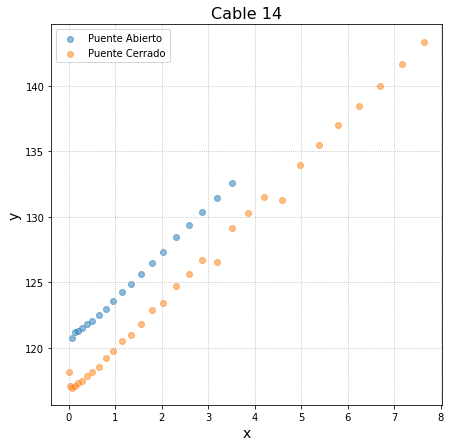

In [ ]:
fig = plt.figure(figsize=(7,7) )

# Observaciones
plt.scatter( df_c14[df_c14['Puente']==0]['x'],  df_c14[df_c14['Puente']==0]['y'], alpha=.5,label='Puente Abierto' )
plt.scatter( df_c14[df_c14['Puente']==1]['x'],  df_c14[df_c14['Puente']==1]['y'], alpha=.5,label='Puente Cerrado' )
# Formateo
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14);
plt.title('Cable 14',fontsize=16)
plt.grid(linestyle=':')
plt.legend()

plt.show()

Se ve clarmente que la relación entre `y` y `x` sigue una recta, y vemos que la pendiente se mantiene aproximadamente igual, lo cual tiene sentido dado que la rigidez a flexión del cable no es función del puente, sino del propio cable. Sí se puede ver un offset entre los puntos, lo que implicaría un cambio en el valor de la tensión según la situación del puente.

###Influencia de la condición del puente

En primer lugar, vamos a estudiar si la condición del puente (abierto o cerrado) influye en las tensiones del Cable 14. Para ello tendremos que utilizar la condición del puente como variable categórica/binaria.

Nuestro modelo explicitará entonces la diferencia de tensiones entre la condición abierto y cerrado, y entrará en juego cuando los datos provengan del puente cerrado:

$$y_j = T + \Delta T\ x_{1,j} + EI\ x_{2,j} + N\left(0,\sigma^{2}\right)$$

donde $x_{2}$ es la variable $x$ definida arriba y x_[1} vale 1 si el puente está cerrado y 0 si abierto. Noten que $EI$ y $\sigma$ no se ven afectadas por la condición del puente en nuestro modelo, ya que los ensayos se realizaron sobre el mismo cable y con los mismos instrumentos de medición.

**Item**: Construya el modelo y grafique las distribuciones posteriores de los parámetros.

In [ ]:
with pm.Model() as model:
# CODIGO DEL ALUMNO ============================================================








# ==============================================================================

    # Posterior de los parámetros
    trace1 = pm.sample( 5000, tune=2000, cores=2 )
    
    # Posterior predictiva de y
    pm.sample_posterior_predictive( trace1, extend_inferencedata=True )

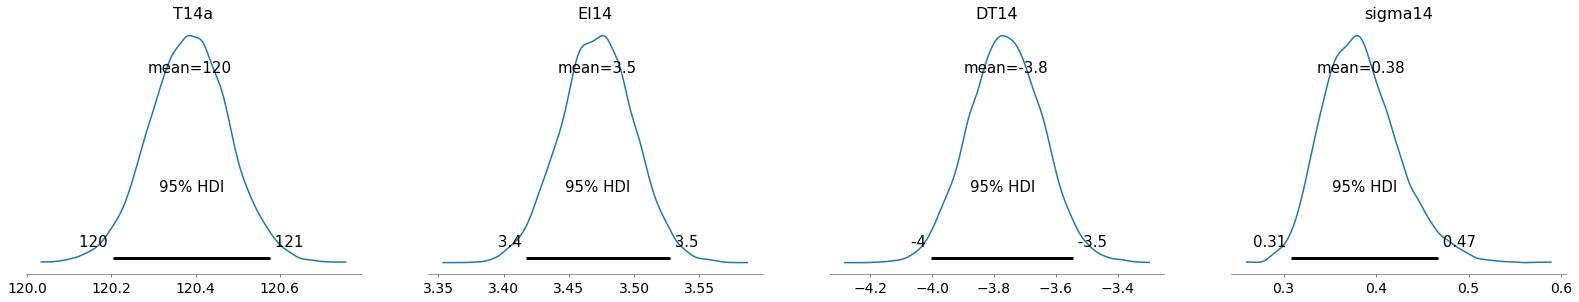

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

**Item**: Viendo el gráfico anterior, ¿se justifica analizar en forma separada las tensiones del Cable 14? ¿Qué criterio utilizó para afirmarlo?

**Su respuesta**:

###Similitudes entre los Cables 10 y 14

Ahora intentaremos simultáneamente encontrar las propiedades de los cables 10 y 14 para la condición abierto. En primer lugar, vamos a suponer que los cables son distintos entre sí.

NOTA: Más allá de que los cables tengan el mismo diámetro y sean del mismo proveedor, la variabilidad natural de la rigidez a flexión de los cables es muy grande debido al proceso de conformación, en comparación al caso de una sección maciza.

Nuestro modelo sería, entonces:

$$y_j = T_{10} + \Delta T_{14}\ x_{1,j} + (EI_{10}+\Delta EI_{14}\ x_{1,j})\ x_{2,j} + N\left(0,\sigma^{2}\right)$$

donde en este caso $x_{1,j}$ Es una variable índice que indica el número de cable (0 si es el Cable 10)

**Item**: Cree un dataframe `df_redA` que contenga únicamente los datos de los cables para la condición "Abierto"

In [ ]:
# CODIGO DEL ALUMNO ############################################################
df_redA =
################################################################################

print(df_redA.head())

         fn_Hz  n  N_Cable  Puente  long_m  masa_p_long_kg_m          y  \
572   2.319371  1        0       0  27.133               3.6  57.029385   
573   4.623484  2        0       0  27.133               3.6  56.654809   
574   6.935225  3        0       0  27.133               3.6  56.654809   
575   9.292744  4        0       0  27.133               3.6  57.217136   
576  11.650263  5        0       0  27.133               3.6  57.555865   

            x  
572  0.013406  
573  0.053625  
574  0.120655  
575  0.214498  
576  0.335154  


**Item**: Construya el modelo y grafique las distribuciones posteriores de los parámetros

In [ ]:
with pm.Model() as model:
# CODIGO DEL ALUMNO ============================================================








# ==============================================================================

    # Posterior de los parámetros
    trace2 = pm.sample( 5000, tune=2000, cores=2 )
    
    # Posterior predictiva de y
    pm.sample_posterior_predictive( trace2, extend_inferencedata=True )


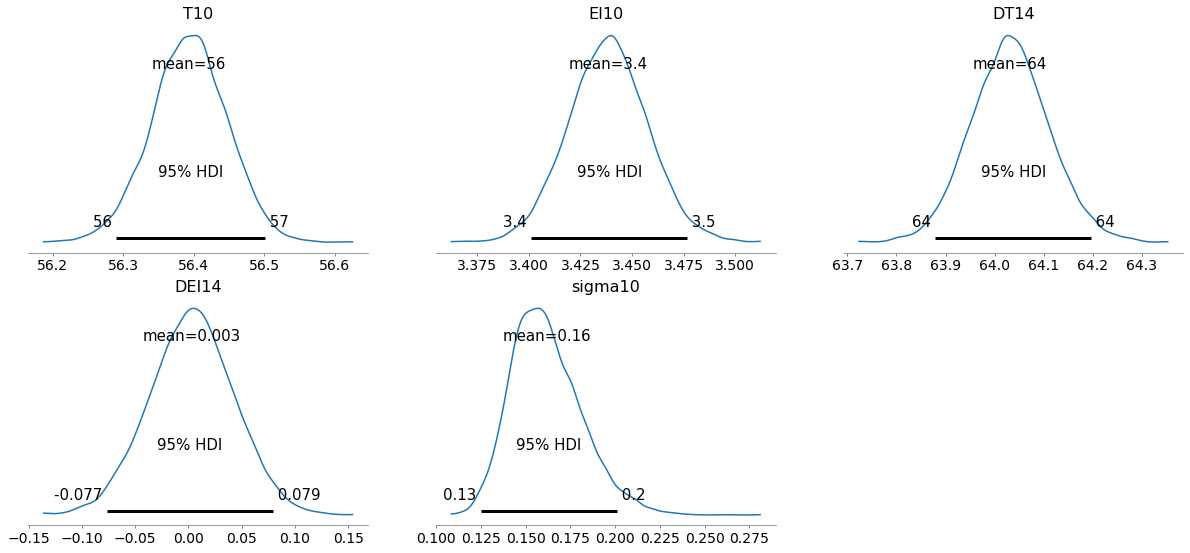

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

**Item**: A partir de los resultados, ¿Puede afirmar que la tensión en los cables es distinta entre el Cable 10 y el Cable 14? ¿Puede afirmar que los Cables tienen distinta rigidez a flexión? ¿Por qué lo afirma?

**Su respuesta**:

**Item**: Visto lo anterior (SPOILER), construya un modelo que considere una misma rigidez $EI$ para cada cable.

NOTA: Incluya en su modelo, a partir de un `pm.deterministic` un cálculo de la distribución posterior de la tensión del Cable 14 (ya que su modelo por default le da únicamente la diferencia entre cables)

In [ ]:
with pm.Model() as model:
# CODIGO DEL ALUMNO ============================================================













# ==============================================================================

    # Posterior de los parámetros
    trace3 = pm.sample( 5000, tune=2000, cores=2 )
    
    # Posterior predictiva de y
    pm.sample_posterior_predictive( trace3, extend_inferencedata=True )

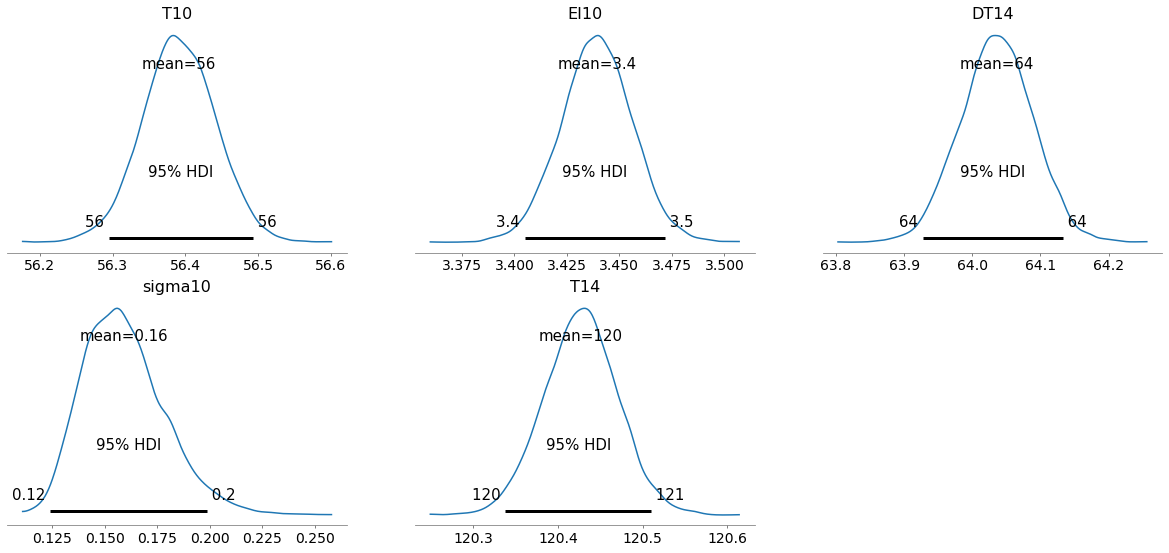

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

**Item**: Compare graficamente la distribución posterior de la Tensiones en el Cable 14 obtenido con el modelo 1 y el modelo 3 (en un mismo gráfico). Compare también la rigidez a flexión.

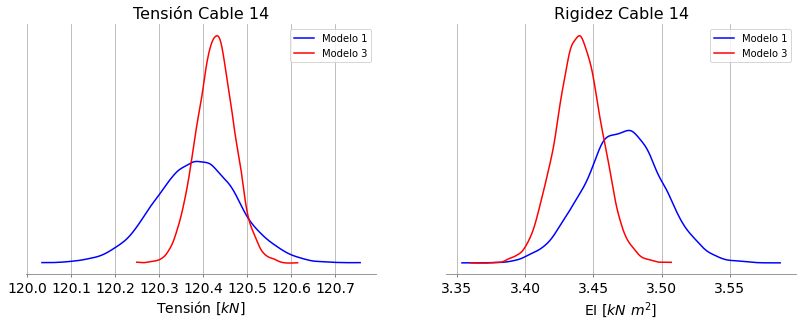

In [ ]:
# CODIGO DEL ALUMNO ============================================================




# ==============================================================================

**Item**: ¿Considera razonable los resultados obtenidos con uno y otro modelo?

**Su respuesta**:

## Ejercicio 2: Clasificación de Galpones según su cerramiento 

En este segundo ejericio, intentaremos seleccionar un modelo para clasificar galpones metálicos según su cerramiento: chapa de acero (`'Metal Panels'`) o paneles de hormigón (`Concrete`).

Para ello vamos a tener que seleccionar las variables predictoras que permitan construir el mejor modelo posible.

Primero, carguemos el Dataset:

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Galpones_v2.csv to Galpones_v2.csv


In [ ]:
#Se crea un DataFrame
df_galpones = pd.read_csv(io.BytesIO(uploaded['Galpones_v2.csv']))
df_galpones.head()

,Frame,W_kip_,Height_in_,L_ft_,alpha,Cladding,Structure,Roof,Snow_psf,Seismic,Wind,Weights,k_lat_kip_ft_,MassParticipation,T_model_s_,T_r1_s_,T_r2_s_,T_S_U_s_
0,1,10.21,190.0,40,2.526,Metal Panels,Clear Span,Monoslope,0,Low,High,0.011666,3.520,0.933,0.546,0.546,0.545,0.707386
1,2,25.16,192.5,100,6.234,Metal Panels,Clear Span,Gabled,0,Low,High,0.032986,12.459,0.619,0.571,0.560,0.454,0.537498
2,3,46.71,220.0,160,8.727,Metal Panels,Clear Span,Monoslope,0,High,High,0.001667,27.663,0.423,0.606,0.580,0.415,0.423907
3,4,13.14,400.0,40,1.200,Metal Panels,Clear Span,Gabled,0,Low,High,0.002174,3.563,0.930,0.602,0.602,0.614,0.953937
4,5,52.23,385.0,100,3.117,Metal Panels,Clear Span,Monoslope,42,High,Low,0.001058,7.218,0.925,0.881,0.880,0.860,1.208260


De todas las columnas, aquellas que podrían llegar a ser de interés son:

- $Weight$ - Peso sísmico : W_kip_
- $Height$ - Altura : Height_in_
- $L$ - Luz : L_ft_
- $\alpha$ - Relación de lados : alpha
- $T$ - Período natural : T_model_s_
- $Snow$ - Peso de Nieve: Snow_psf
- $Seismic$ - Simicidad: Seismic
- $Wind$ - Viento de Diseño: Wind
- Rigidez lateral: k_lat_kip_ft
- $Cladding$ - Material de cerramiento: Cladding

###Análisis Exploratorio de Datos

Lo primero que vamos a hacer es curar el dataset, simplificando los nombres de algunas variables y realizando conversiones de unidades.

In [ ]:
#Transformo unidades:
df_galpones['Height_ft_'] = df_galpones['Height_in_']/12

#Me quedon con las columnas que voy a usar y renombro:
df_galpones = df_galpones[['W_kip_', 'Height_ft_', 'L_ft_', 'alpha', 'Snow_psf',  'Seismic', 'Wind', 'T_model_s_', 'Cladding']]
df_galpones = df_galpones.rename(columns={'W_kip_': 'Weight', 'Height_ft_': 'Height', 'Snow_psf': 'Snow', 'L_ft_': 'L', 'T_model_s_': 'T'})

df_galpones.head()

,Weight,Height,L,alpha,Snow,Seismic,Wind,T,Cladding
0,10.21,15.833333,40,2.526,0,Low,High,0.546,Metal Panels
1,25.16,16.041667,100,6.234,0,Low,High,0.571,Metal Panels
2,46.71,18.333333,160,8.727,0,High,High,0.606,Metal Panels
3,13.14,33.333333,40,1.200,0,Low,High,0.602,Metal Panels
4,52.23,32.083333,100,3.117,42,High,Low,0.881,Metal Panels


Anteriormente pudo ver que varias de las variables son categóricas (por ejemplo, `Wind` toma valores de `High` o `Low`). Para poder utilizarlas en un modelo de clasificación como índice en el caso de las predictoras (y como probabilidad para el clasificador), va a ser necesario convertirlas en variables binarias.

**Item**: Convierta las variables `Seismic`, `Wind`, `Snow` y `Cladding` en variables binarias. Para este último, considere `Concrete`=1.

In [ ]:
# CODIGO DEL ALUMNO ============================================================






# ==============================================================================

In [ ]:
df_galpones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    192 non-null    float64
 1   Height    192 non-null    float64
 2   L         192 non-null    int64  
 3   alpha     192 non-null    float64
 4   Snow      192 non-null    int64  
 5   Seismic   192 non-null    int64  
 6   Wind      192 non-null    int64  
 7   T         192 non-null    float64
 8   Cladding  192 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 13.6 KB


Abajo puede ver todas las variables de a pares, distinguiendo los datos que corresponden a paneles de hormigón vs acero. Se puede ver claramente que el peso de las estructuras de hormigón tiende a ser mayor que el de las estructuras de acero.

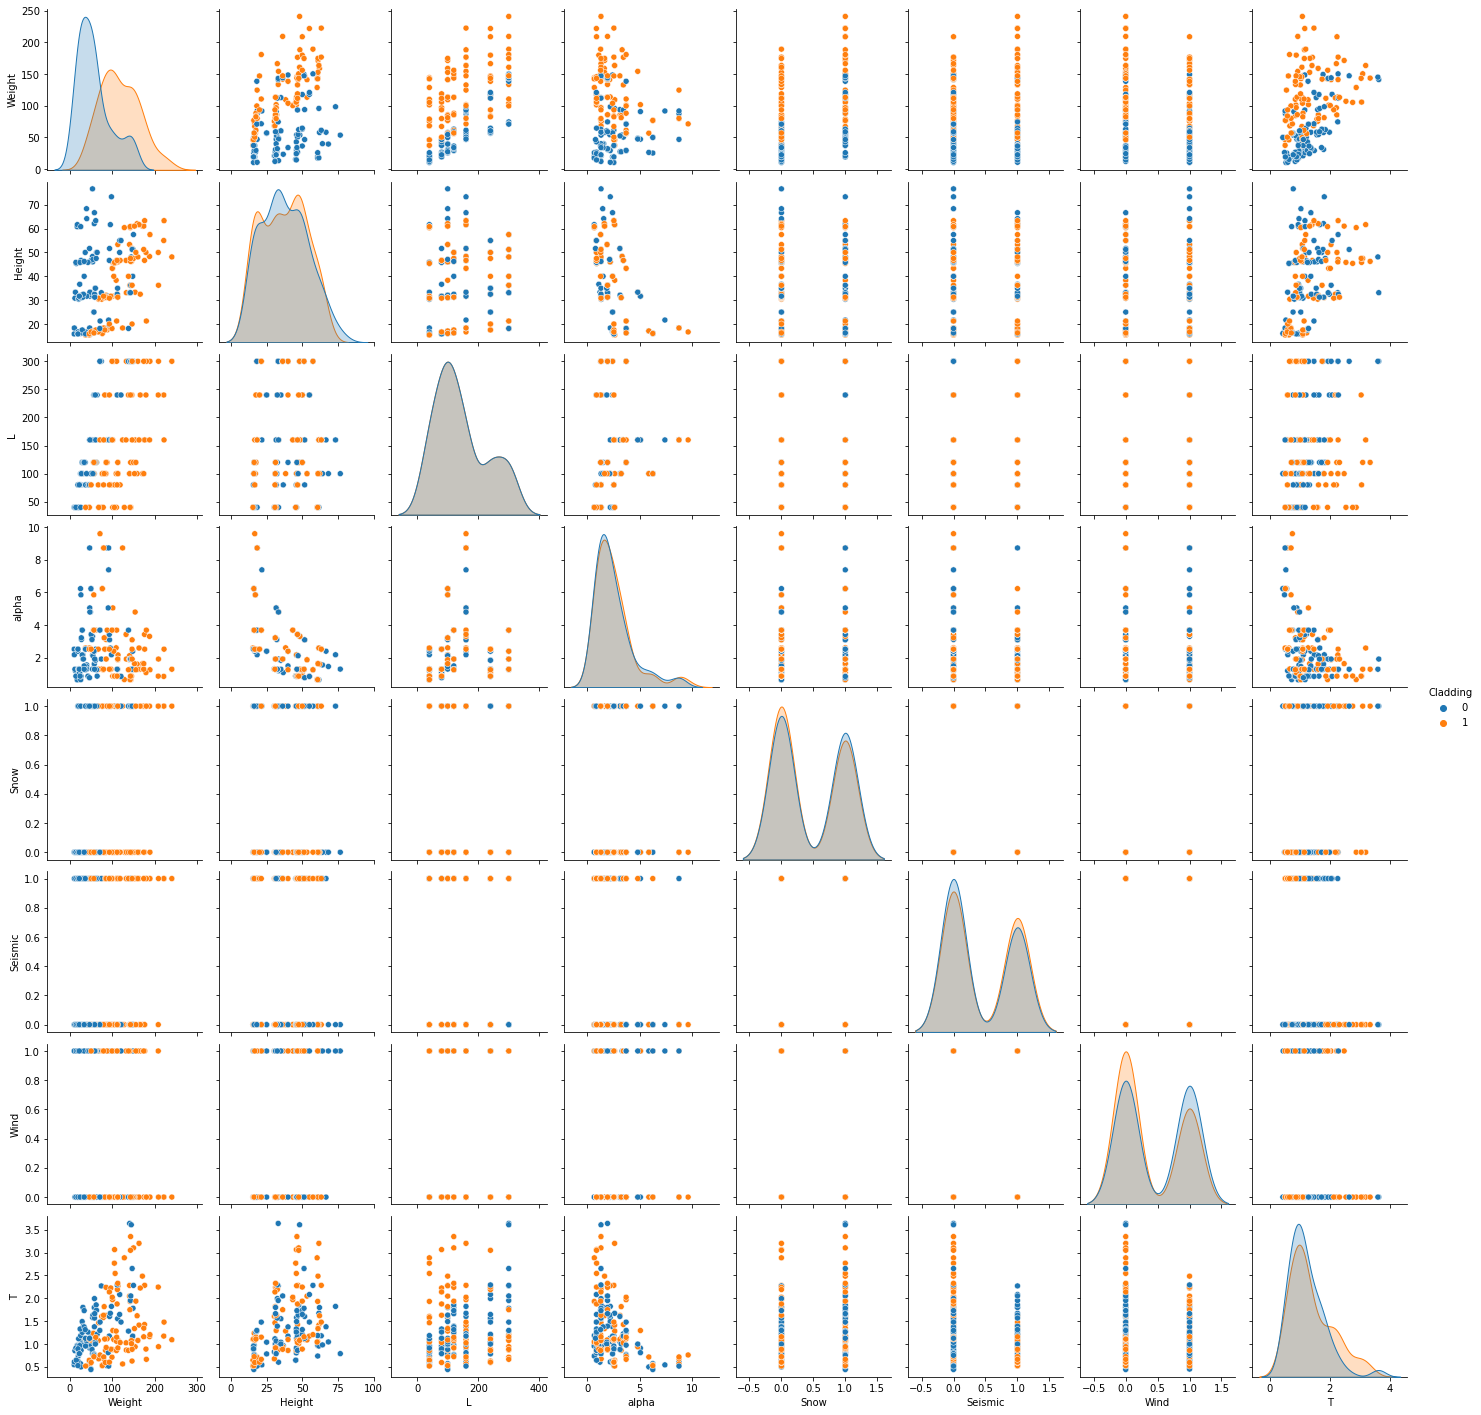

In [ ]:
sns.pairplot(df_galpones, hue='Cladding');

Viendo la correlación de las distintas variables con el tipo de cerramiento, nuevamente el peso $W$ se muestra fuertemente correlacionado con el mismo, mientras que el resto de las variables se encuentra no correlacionado.

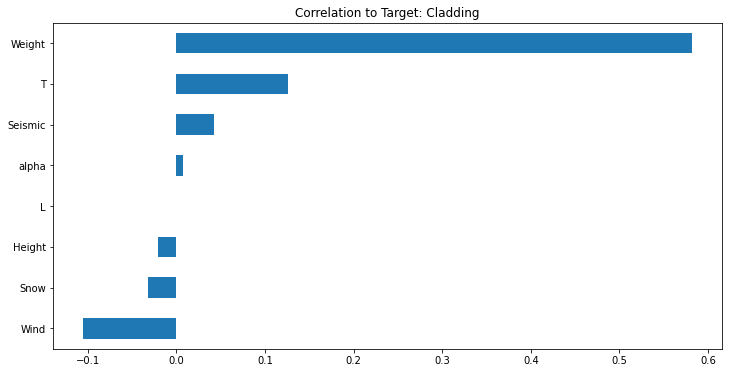


 Weight     0.581695
T          0.125874
Seismic    0.042117
alpha      0.008115
L          0.000000
Height    -0.020115
Snow      -0.031388
Wind      -0.104990
dtype: float64


In [ ]:
n_fts = len(df_galpones.columns)

df_galpones.drop('Cladding',axis=1).corrwith(df_galpones['Cladding']).sort_values(ascending=True).plot(kind='barh', 
                                                                                     figsize=(12, 6))
plt.title('Correlation to Target: Cladding')
plt.show()

print('\n',df_galpones.drop('Cladding',axis=1).corrwith(df_galpones['Cladding']).sort_values(ascending=False))

**Item**: Dada la alta correlación entre el panel de cerramiento y el peso, establezca si existe causalidad en función de su conocimiento ingenieril. En caso afirmativo, justifique e indique cuál variable explica a cual

**Su respuesta**

**Item**: ¿Que no haya correlación entre las otras variables y el material de cerramiento implica que no aportarían información a un modelo de clasificación? ¿Por qué?

**Su respuesta**:

Ahora bien, dado que el peso presenta una fuerte correlación con el material de cerramiento, puede ser interesante ver si la variable peso se encuentra correlacionada con otras variables. Para ello, graficaremos la matriz de correlación cruzada.

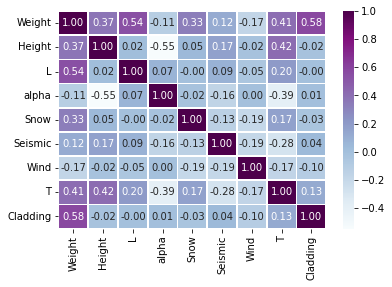

In [ ]:
# Gráfico de calor para la matriz de correlación
sns.heatmap(df_galpones.corr(), cmap='BuPu', fmt='.2f', annot=True, linewidths=.6);

**Item** En base al grafico de correlación cruzada de arriba, defina qué variables parecen encontrarse correlacionadas con el peso $W$. ¿Cuáles de ellas cree que son explicativas del peso y cuáles son explicadas por el peso? ¿Por qué?

**Su respuesta**:

**Item**: En base a sus respuestas, ¿Qué variables son, a priori, las que podrían permitirle predecir con mayor precisión si un galpón tiene cerramiento de acero u hormigón?

**Su respuesta**:

###Construcción de Modelos

Con todo lo visto arriba, llegó el momento de construir distintos modelos de regresión logística/clasificación. No es más que el ajuste para un modelo de Bernoulli:

$$y \sim Bernoulli(p)$$

$$logit(p) = \beta_{0}+\sum{\beta_{i}x_{i}}$$

El objetivo de esta sección es que usted proponga distintos modelos (de hasta 3 variables) para luego evaluar con cuál de ellos quedarse.

####Modelo 1

Para empezar, el Modelo 1 será el más sencillo y tendrá a $W$ como única variable explicativa. Le recomendamos ver detenidamente la sintaxis escrita por nosotros para que luego la repita en modelos siguientes.

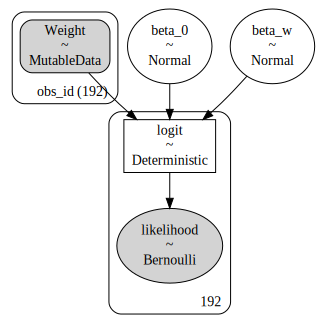

In [ ]:
with pm.Model() as model1:
    w_ = pm.MutableData("Weight", df_galpones['Weight'], dims="obs_id")

    # Priors
    beta_0 = pm.Normal( "beta_0", mu=0, sigma=100)
    beta_w = pm.Normal( "beta_w", mu=0, sigma=10)
    
    #the probability of belonging to class 1
    logit = pm.Deterministic('logit', beta_0+beta_w*w_)
    obs = pm.Bernoulli('likelihood', logit_p = logit, observed = df_galpones['Cladding'])

pm.model_to_graphviz(model1)

In [ ]:
with model1:
    trace1 = pm.sample(3000, tune=2000, cores=2, target_accept=0.9)
    ppc1 = pm.sample_posterior_predictive( trace1, extend_inferencedata=True)

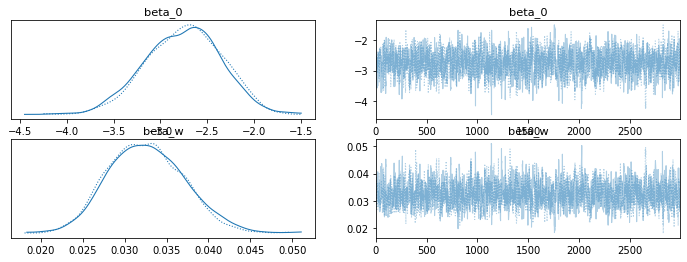

In [ ]:
az.plot_trace(trace1,var_names='~logit')
plt.show()

#### Modelo 2

Como segundo modelo propuesto por nosotros, usaremos 2 variables, agregando la zonficación sísmica en la que se encuentra el Galpón.

- ¿El error in-sample debiera reducirse? ¿Eso implica que el modelo es mejor?

**Su Respuesta**:

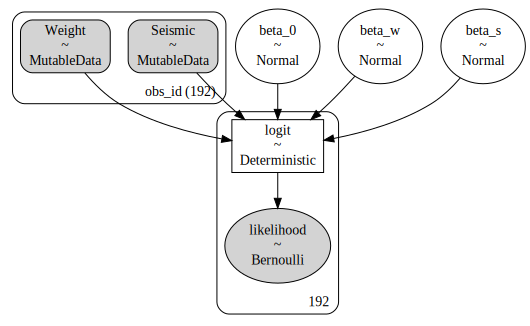

In [ ]:
with pm.Model() as model2:
    w_ = pm.MutableData("Weight", df_galpones['Weight'], dims="obs_id")
    s_ = pm.MutableData("Seismic", df_galpones['Seismic'], dims="obs_id")

    # Priors
    beta_0 = pm.Normal( "beta_0", mu=0, sigma=100)
    beta_w = pm.Normal( "beta_w", mu=0, sigma=10)
    beta_s = pm.Normal( "beta_s", mu=0, sigma=10)
    
    #the probability of belonging to class 1
    logit = pm.Deterministic('logit',  beta_0+beta_w*w_+beta_s*s_)
    obs = pm.Bernoulli('likelihood', logit_p=logit, observed=df_galpones['Cladding'])

pm.model_to_graphviz(model2)

In [ ]:
with model2:
    trace2 = pm.sample(3000, tune=2000, cores=2, target_accept=0.9)
    ppc2 = pm.sample_posterior_predictive( trace2, extend_inferencedata=True)

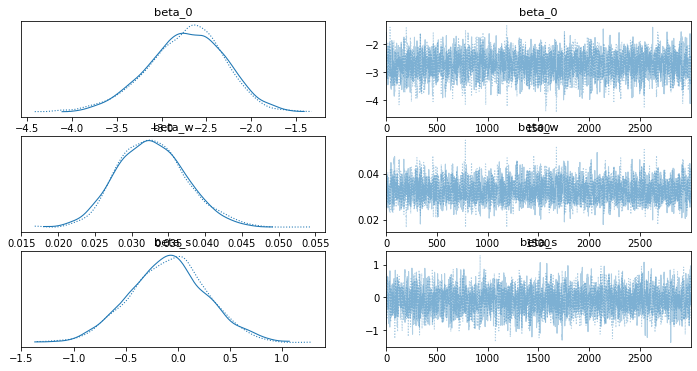

In [ ]:
az.plot_trace(trace2,var_names='~logit')
plt.show()

#### Modelo 3

**Item**: Proponga otro modelo de 2 variables explicativas, siguiendo el formato del modelo 2 (¡intente que sea mejor!).

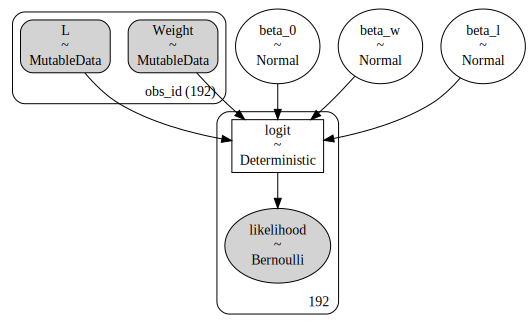

In [ ]:
with pm.Model() as model3:

# CODIGO DEL ALUMNO ============================================================





# CODIGO DEL ALUMNO ============================================================

pm.model_to_graphviz(model3)

In [ ]:
with model3:
    trace3 = pm.sample(3000, tune=2000, cores=2, target_accept=0.9)
    pcc3 = pm.sample_posterior_predictive( trace3, extend_inferencedata=True)

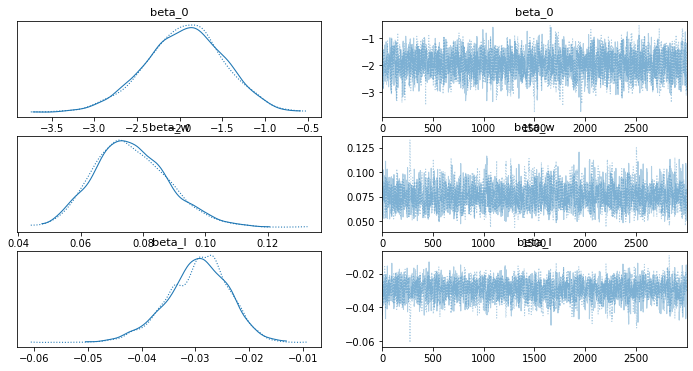

In [ ]:
az.plot_trace(trace3,var_names='~logit')
plt.show()

#### Modelo 4

**Item**: Proponga un cuarto modelo, de 3 variables explicativas, siguiendo el formato del modelo 2. Elija las variables que cree expliquen mejor el cerramiento, según su análisis previo.

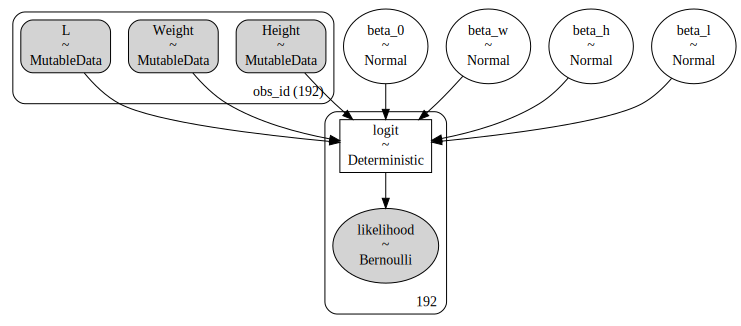

In [ ]:
with pm.Model() as model4:

# CODIGO DEL ALUMNO ============================================================





# ==============================================================================

pm.model_to_graphviz(model4)

In [ ]:
with model4:
    trace4 = pm.sample(3000, tune=2000, cores=2, target_accept=0.9)
    pcc4 = pm.sample_posterior_predictive( trace4, extend_inferencedata=True)

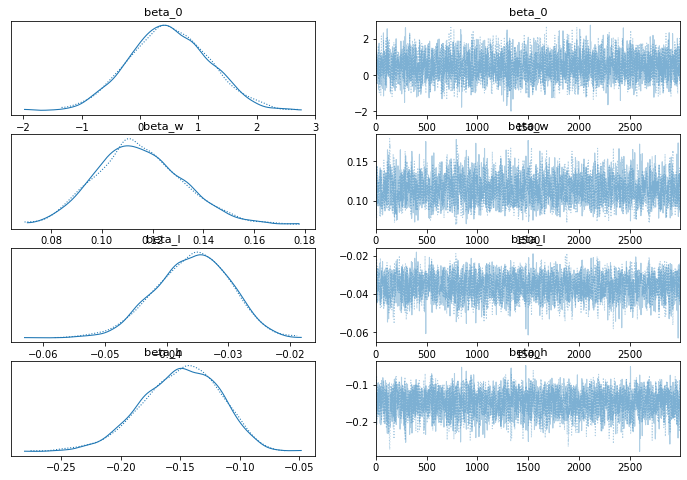

In [ ]:
az.plot_trace(trace4,var_names='~logit')
plt.show()

#### Modelo 5

**Item**: Proponga un segundo modelo, otra vez con 3 variables explicativas, siguiendo el formato del modelo 2.

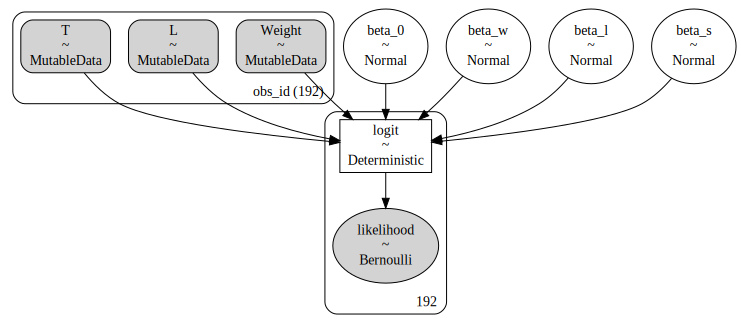

In [ ]:
with pm.Model() as model5:

# CODIGO DEL ALUMNO ============================================================






# ==============================================================================

pm.model_to_graphviz(model5)

In [ ]:
with model5:
    trace5 = pm.sample(3000, tune=2000, cores=2, target_accept=0.9)
    pcc5 = pm.sample_posterior_predictive( trace5, extend_inferencedata=True)

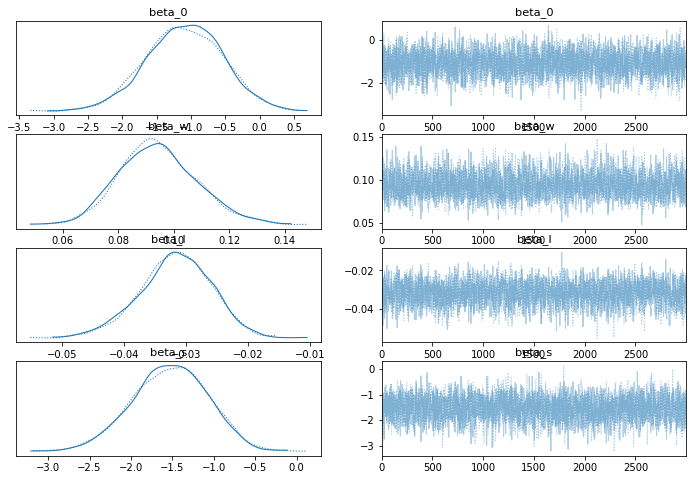

In [ ]:
az.plot_trace(trace5,var_names='~logit')
plt.show()

### Selección del Modelo

**Item**: A partir de la estimación del Leave-One-Out Cross-Validation (PSIS-LOO CV), haga un ranking de los modelos elaborados y seleccione el modelo que crea más adecuado

In [ ]:
# Comparamos los modelos polinómicos mediane PSIS-LOOCV
model_comp = {'1':trace1,'2':trace2,'3':trace3,'4':trace4,'5':trace5}

# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

az_comp_loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
4,0,-52.682755,4.417876,0.000000,0.917475,8.203803,0.000000,False,log
5,1,-66.609893,4.506729,13.927138,0.000000,7.704669,5.448820,False,log
3,2,-71.804012,3.681755,19.121257,0.052344,8.072421,6.641480,False,log
1,3,-96.681773,1.984300,43.999018,0.030181,7.439716,8.865982,False,log
2,4,-97.699612,3.007589,45.016857,0.000000,7.542281,8.923062,False,log


**Item**: Muestre en forma gráfica los resultados

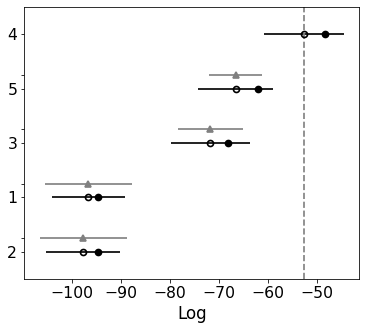

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

**Item**: Indique qué modelo seleccionó. Viendo el ordenamiento de los modelos, ¿incorporar más variables siempre mejora el modelo?

**Su Respuesta**:

## Ejercicio 3: Modelo de regresión para el dataset seleccionado

El objetivo de este tercer ejercicio es que usted explore distintos modelos de regresión para su dataset seleccionado. Para ello:
- Selecciona la variable a predecir/ajustar.
- Identificar las variables a incluir. ¿Se basó en un modelo causal o un modelo estadístico?
- Construya al menos 3 modelos de distinto nivel de complejidad (y número de parámetros). Indique explícitamente el tipo de modelo (lineal, splines, normal, lognormal, poisson, bernoulli, etc)
- Seleccione el "mejor modelo" por la metodología que crea más adecuada